In [1]:
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms
import torch.optim as optim
from torch.optim import lr_scheduler

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import math, time, copy, os

# 1 - Tensor Basics

In [23]:
# Everything in pytorch is based on Tensor operations.
# A tensor can have different dimensions so it can be 1d, 2d, or even 3d and higher (scalar, vector, matrix, tensor)

# torch.empty(size): uninitiallized
x = torch.empty(1) # scalar
print(x)
x = torch.empty(3) # vector, 1D
print(x)
x = torch.empty(2,3) # matrix, 2D
print(x)
x = torch.empty(2,2,3) # tensor, 3 dimensions
print(x)
x = torch.empty(2,2,2,3) # tensor, 4 dimensions
print(x)

tensor([6.7062e+22])
tensor([0., 0., 0.])
tensor([[9.2755e-39, 1.0561e-38, 7.1633e-39],
        [9.0919e-39, 8.4490e-39, 9.6429e-39]])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
tensor([[[[9.2755e-39, 1.0561e-38, 7.1633e-39],
          [9.0919e-39, 8.4490e-39, 9.6429e-39]],

         [[9.6429e-39, 1.0194e-38, 9.1837e-39],
          [4.6837e-39, 9.9184e-39, 9.0000e-39]]],


        [[[1.0561e-38, 1.0653e-38, 4.1327e-39],
          [8.9082e-39, 9.8265e-39, 9.4592e-39]],

         [[1.0561e-38, 1.0286e-38, 1.0929e-38],
          [1.0102e-38, 4.5918e-39, 4.6837e-39]]]])


In [24]:
# torch.rand(size): random numbers [0, 1]
x = torch.rand(5, 3)
print(x)

tensor([[0.3448, 0.5563, 0.6852],
        [0.4843, 0.1852, 0.4757],
        [0.2946, 0.2348, 0.9744],
        [0.7820, 0.5614, 0.6313],
        [0.2734, 0.9907, 0.0563]])


In [25]:
# torch.zeros(size), fill with 0
# torch.ones(size), fill with 1
x, y = torch.zeros(5, 3), torch.ones(5, 2)
print(x, y)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])


In [26]:
# check size
print(x.size())

# check data type
print(x.dtype)

torch.Size([5, 3])
torch.float32


In [27]:
# specify types, torch.float32 default, can also do torch.int, torch.double
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

# check type
print(x.dtype)


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)
torch.float16


In [29]:
# construct from data
x = torch.tensor([5.5, 3])
print(x, x.size())

tensor([5.5000, 3.0000]) torch.Size([2])


In [30]:
# requires_grad argument
# This will tell pytorch that it will need to calculate the gradients for this tensor
# later in your optimization steps
# i.e. this is a variable in your model that you want to optimize
x = torch.tensor([5.5, 3], requires_grad=True)

In [31]:
# Operations
y = torch.rand(2, 2)
x = torch.rand(2, 2)

# elementwise addition
z = x + y
torch.add(x,y) # does same as above

# in-place addition, everything with a trailing underscore is an in-place operation
# i.e. it will modify the variable
y.add_(x)

# subtraction
z = x - y
z = torch.sub(x, y)

# multiplication
z = x * y
z = torch.mul(x,y)
y.mul_(x)

# division
z = x / y
z = torch.div(x,y)


In [32]:
# Slicing
x = torch.rand(5,3)
print(x)
print(x[:, 0]) # all rows, column 0
print(x[1, :]) # row 1, all columns
print(x[1,1]) # element at 1, 1

# Get the actual value if only 1 element in your tensor
print(x[1,1].item())

tensor([[0.4553, 0.9628, 0.3184],
        [0.1778, 0.8979, 0.0676],
        [0.7388, 0.0814, 0.9793],
        [0.9709, 0.9634, 0.7002],
        [0.3897, 0.5502, 0.5409]])
tensor([0.4553, 0.1778, 0.7388, 0.9709, 0.3897])
tensor([0.1778, 0.8979, 0.0676])
tensor(0.8979)
0.8978679776191711


In [33]:
# Reshape with torch.view()
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
# if -1 it pytorch will automatically determine the necessary size
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [35]:
# Numpy
# Converting a Torch Tensor to a NumPy array and vice versa is very easy
a = torch.ones(5)
print(a)

# torch to numpy with .numpy()
b = a.numpy()
print(b)
print(type(b))
# Carful: If the Tensor is on the CPU (not the GPU),
# both objects will share the same memory location, so changing one
# will also change the other
a.add_(1)
print(a)
print(b)

# numpy to torch with .from_numpy(x)
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)
# again be careful when modifying
a += 1
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
# by default all tensors are created on the CPU,
# but you can also move them to the GPU (only if it's available )
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    # z = z.numpy() # not possible because numpy cannot handle GPU tenors
    # move to CPU again
    z.to("cpu")       # ``.to`` can also change dtype together!
    # z = z.numpy()

# 2 - Gradient Calculation With Autograd

In [42]:
# The autograd package provides automatic differentiation 
# for all operations on Tensors

# requires_grad = True -> tracks all operations on the tensor. 
x = torch.randn(3, requires_grad=True)

In [43]:
# whenever operations are done with tensor, a computational graph is created (each operation is a node with inputs and output)
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor used to calculate gradients in backpropagation
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

# image below is one node of the graph after doing the first operation above - gradient function depends on the type of operation done

tensor([-1.2056, -0.4835, -1.1400], requires_grad=True)
tensor([0.7944, 1.5165, 0.8600], grad_fn=<AddBackward0>)


<img src="autograd.png">

In [44]:
# Do more operations on y
z = y * y * 2
print(z)
z = z.mean()
print(z)

tensor([1.2621, 4.5994, 1.4793], grad_fn=<MulBackward0>)
tensor(2.4469, grad_fn=<MeanBackward0>)


In [45]:
# Let's compute the gradients with backpropagation
# When we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function w.r.t. the tensor

z.backward() # calculates dz/dx - vector-Jacobian product
print(x.grad) # where gradients are stored

tensor([1.0592, 2.0220, 1.1467])


In [46]:
# Generally speaking, torch.autograd is an engine for computing vector-Jacobian product
# It computes partial derivates while applying the chain rule

# -------------
# Model with non-scalar output:
# If a Tensor is non-scalar (more than 1 elements), we need to specify arguments for backward() 
# specify a gradient argument that is a tensor of matching shape.
# needed for vector-Jacobian product

x = torch.randn(3, requires_grad=True)

y = x * 2
for _ in range(10):
    y = y * 2

print(y)
print(y.shape)

v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float32)
y.backward(v)
print(x.grad)

tensor([ 3143.2620, -2902.8093,   472.6248], grad_fn=<MulBackward0>)
torch.Size([3])
tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [47]:
# -------------
# Stop a tensor from tracking history - 3 options show below:
# For example during our training loop when we want to update our weights
# then this update operation should not be part of the gradient computation
# - x.requires_grad_(False)
# - x.detach()
# - wrap in 'with torch.no_grad():'

# .requires_grad_(...) changes an existing flag in-place.
a = torch.randn(2, 2)
print(a.requires_grad)
b = ((a * 3) / (a - 1))
print(b.grad_fn)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

# .detach(): get a new Tensor with the same content but no gradient computation:
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
b = a.detach()
print(b.requires_grad)

# wrap in 'with torch.no_grad():'
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    print((x ** 2).requires_grad)

False
None
True
True
False
True
False


In [48]:
# -------------
# backward() accumulates the gradient for this tensor into .grad attribute.
# !!! We need to be careful during optimization !!!
# Use .zero_() to empty the gradients before a new optimization step!
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    # just a dummy example
    model_output = (weights*3).sum()
    model_output.backward()
    
    print(weights.grad)

    # optimize model, i.e. adjust weights...
    with torch.no_grad():
        weights -= 0.1 * weights.grad

    # this is important! It affects the final weights & output
    weights.grad.zero_()

print(weights)
print(model_output)

# Optimizer has zero_grad() method
# optimizer = torch.optim.SGD([weights], lr=0.1)
# During training:
# optimizer.step()
# optimizer.zero_grad()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([0.1000, 0.1000, 0.1000, 0.1000], requires_grad=True)
tensor(4.8000, grad_fn=<SumBackward0>)


# 3 - Backpropagation Theory

See Backpropagation.pdf

In [49]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

# This is the parameter we want to optimize -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)

# forward pass to compute loss
y_predicted = w * x
loss = (y_predicted - y)**2
print(loss)

# backward pass to compute gradient dLoss/dw
loss.backward()
print(w.grad)

# update weights
# next forward and backward pass...

# continue optimizing:
# update weights, this operation should not be part of the computational graph
with torch.no_grad():
    w -= 0.01 * w.grad
# don't forget to zero the gradients
w.grad.zero_()

# next forward and backward pass...

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


tensor(0.)

# 4 - Gradient Descent With Autograd and Backpropagation

In [50]:
# Compute every step manually first

'''
General Training Pipeline Steps:
- Prediction
- Gradient Computation
- Loss Computation
- Parameter updates
'''

# Linear regression
# f = w * x ... here, f = 2 * x
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0 # same w as in f = w * x that we want to optimise

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# gradient
# J = MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2x(w*x - y)
def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}') # 

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction (forward pass)
    y_pred = forward(X)
    # loss
    l = loss(Y, y_pred)
    # calculate gradients
    dw = gradient(X, Y, y_pred)
    # update weights
    w -= learning_rate * dw

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
     
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [51]:
# Now compute every step using the tool specified

'''
General Training Pipeline Steps:
- Prediction: PyTorch Model (needs to be designed) - done in section 5
- Gradient Computation: Autograd (automatic backpropagation algorithm) - done below
- Loss Computation: PyTorch Loss class (needs to be selected) - done in section 5
- Parameter updates: PyTorch Optimiser class (needs to be selected) - done in section 5
'''

# Here we replace the manually computed gradient with autograd

# Linear regression
# f = w * x 

# here : f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # prediction (forward pass)
    y_pred = forward(X)
    # loss
    l = loss(Y, y_pred)
    # calculate gradients = backward pass
    l.backward()
    # update weights: w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad
    # zero the gradients after updating
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


# 5 - Training Pipeline: Model, Loss, and Optimizer

In [53]:
'''
General Training Pipeline Steps:
- Prediction: PyTorch Model (needs to be designed) - done below
- Gradient Computation: Autograd (automatic backpropagation algorithm)
- Loss Computation: PyTorch Loss class (needs to be selected) - done here
- Parameter updates: PyTorch Optimiser class (needs to be selected) - done here
'''

# 1) Design model (input, output size, forward pass with different layers)
# 2) Construct loss and optimizer
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# 1) Design Model: Weights to optimize and forward function
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w * x

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

# callable function
loss = nn.MSELoss() # mean squared error

optimizer = torch.optim.SGD([w], lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass
    y_predicted = forward(X)
    # loss
    l = loss(Y, y_predicted)
    # calculate gradients = backward pass
    l.backward()
    # update weights
    optimizer.step()
    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print('epoch ', epoch+1, ': w = ', w, ' loss = ', l)

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

Prediction before training: f(5) = 0.000
epoch  1 : w =  tensor(0.3000, requires_grad=True)  loss =  tensor(30., grad_fn=<MseLossBackward0>)
epoch  11 : w =  tensor(1.6653, requires_grad=True)  loss =  tensor(1.1628, grad_fn=<MseLossBackward0>)
epoch  21 : w =  tensor(1.9341, requires_grad=True)  loss =  tensor(0.0451, grad_fn=<MseLossBackward0>)
epoch  31 : w =  tensor(1.9870, requires_grad=True)  loss =  tensor(0.0017, grad_fn=<MseLossBackward0>)
epoch  41 : w =  tensor(1.9974, requires_grad=True)  loss =  tensor(6.7705e-05, grad_fn=<MseLossBackward0>)
epoch  51 : w =  tensor(1.9995, requires_grad=True)  loss =  tensor(2.6244e-06, grad_fn=<MseLossBackward0>)
epoch  61 : w =  tensor(1.9999, requires_grad=True)  loss =  tensor(1.0176e-07, grad_fn=<MseLossBackward0>)
epoch  71 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(3.9742e-09, grad_fn=<MseLossBackward0>)
epoch  81 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(1.4670e-10, grad_fn=<MseLossBackward0>)
epoch  

In [55]:
# 0) Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32) # both are 2D arrays
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')
# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch
input_size = n_features
output_size = n_features

# we can call this model with samples X
model = nn.Linear(input_size, output_size) # linear model knows we want to optimise 'w' in f=wx

# to write custom model, need to extend nn.Module and define __init__, forward()... below does same as above
'''
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)
'''

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters (weight and bias)
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')


#samples: 4, #features: 1
Prediction before training: f(5) = -3.231
epoch  1 : w =  -0.28043633699417114  loss =  tensor(51.7713, grad_fn=<MseLossBackward0>)
epoch  11 : w =  1.3744432926177979  loss =  tensor(1.4753, grad_fn=<MseLossBackward0>)
epoch  21 : w =  1.648272156715393  loss =  tensor(0.1661, grad_fn=<MseLossBackward0>)
epoch  31 : w =  1.6997346878051758  loss =  tensor(0.1248, grad_fn=<MseLossBackward0>)
epoch  41 : w =  1.7152106761932373  loss =  tensor(0.1167, grad_fn=<MseLossBackward0>)
epoch  51 : w =  1.724685788154602  loss =  tensor(0.1099, grad_fn=<MseLossBackward0>)
epoch  61 : w =  1.7329891920089722  loss =  tensor(0.1035, grad_fn=<MseLossBackward0>)
epoch  71 : w =  1.7409038543701172  loss =  tensor(0.0975, grad_fn=<MseLossBackward0>)
epoch  81 : w =  1.7485616207122803  loss =  tensor(0.0918, grad_fn=<MseLossBackward0>)
epoch  91 : w =  1.7559895515441895  loss =  tensor(0.0865, grad_fn=<MseLossBackward0>)
Prediction after training: f(5) = 9.511


# 6 - Linear Regression

epoch: 10, loss = 3962.6675
epoch: 20, loss = 2794.5825
epoch: 30, loss = 1998.3729
epoch: 40, loss = 1455.5300
epoch: 50, loss = 1085.3508
epoch: 60, loss = 832.8633
epoch: 70, loss = 660.6152
epoch: 80, loss = 543.0830
epoch: 90, loss = 462.8705
epoch: 100, loss = 408.1176


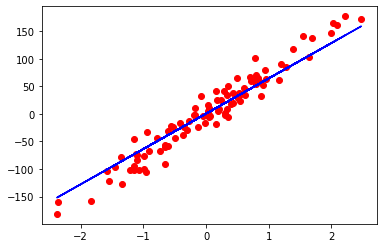

In [2]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4) 
# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32)) # converting from double to float (double will cause errors (apparently))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # reshape to 1 column (view is built-in Python method to reshape)

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    # Backward pass and update weights
    loss.backward()
    optimizer.step()
    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy() # detach creates new tensor and takes operation out of computational graph (so no gradient calculations)
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# 7 - Logistic Regression

In [4]:
# 0) Prepare data
bc = datasets.load_breast_cancer() # binary classification
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) Model
# Linear model f = wx + b , sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegression(n_features)

# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss() # binary cross-entropy loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    # Backward pass and update
    loss.backward()
    optimizer.step()
    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Evaluation
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round() # converting to 0 or 1
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0]) # add 1 for every correct prediction then divide by number of all labels
    print(f'accuracy: {acc.item():.4f}') # can improve by tuning learning rate, number of epochs, optimiser type etc

epoch: 10, loss = 0.4870
epoch: 20, loss = 0.4153
epoch: 30, loss = 0.3670
epoch: 40, loss = 0.3319
epoch: 50, loss = 0.3051
epoch: 60, loss = 0.2838
epoch: 70, loss = 0.2665
epoch: 80, loss = 0.2520
epoch: 90, loss = 0.2397
epoch: 100, loss = 0.2291
accuracy: 0.8947


# 8 - Dataset and DataLoader Batch Training

In [6]:
# gradient computation etc. not efficient for whole data set
# -> divide dataset into small batches

'''
# training loop
for epoch in range(num_epochs):
    # loop over all batches
    for i in range(total_batches):
        batch_x, batch_y = ...
'''

# epoch = one forward and backward pass of ALL training samples
# batch_size = number of training samples used in one forward/backward pass
# number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of sampes
# e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch

# --> DataLoader can do the batch computation for us

# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

'\n# training loop\nfor epoch in range(num_epochs):\n    # loop over all batches\n    for i in range(total_batches):\n        batch_x, batch_y = ...\n'

In [12]:
# wine csv has 1 of 3 class labels in first column, several features in others
class WineDataset(Dataset):

    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('pytorch_batch_wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index] # returns tuple

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [13]:
# create dataset
dataset = WineDataset()

# get first sample and unpack
first_data = dataset[0]
features, labels = first_data
print(features, labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [14]:
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
# num_workers: faster loading with multiple subprocesses
# !!! IF YOU GET AN ERROR DURING LOADING, SET num_workers TO 0 !!!
train_loader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=0) # num_workers for parallel processing

# convert to an iterator and look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
features, labels = data
print(features, labels)


tensor([[1.2430e+01, 1.5300e+00, 2.2900e+00, 2.1500e+01, 8.6000e+01, 2.7400e+00,
         3.1500e+00, 3.9000e-01, 1.7700e+00, 3.9400e+00, 6.9000e-01, 2.8400e+00,
         3.5200e+02],
        [1.3730e+01, 1.5000e+00, 2.7000e+00, 2.2500e+01, 1.0100e+02, 3.0000e+00,
         3.2500e+00, 2.9000e-01, 2.3800e+00, 5.7000e+00, 1.1900e+00, 2.7100e+00,
         1.2850e+03],
        [1.3730e+01, 4.3600e+00, 2.2600e+00, 2.2500e+01, 8.8000e+01, 1.2800e+00,
         4.7000e-01, 5.2000e-01, 1.1500e+00, 6.6200e+00, 7.8000e-01, 1.7500e+00,
         5.2000e+02],
        [1.3030e+01, 9.0000e-01, 1.7100e+00, 1.6000e+01, 8.6000e+01, 1.9500e+00,
         2.0300e+00, 2.4000e-01, 1.4600e+00, 4.6000e+00, 1.1900e+00, 2.4800e+00,
         3.9200e+02]]) tensor([[2.],
        [1.],
        [3.],
        [2.]])


In [15]:
# Dummy Training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4) # 4 is batch_size
print(total_samples, n_iterations)
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
        # Run your training process (dummy results printed below)
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

178 45
Epoch: 1/2, Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 20/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 25/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 30/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 35/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 40/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 45/45| Inputs torch.Size([2, 13]) | Labels torch.Size([2, 1])
Epoch: 2/2, Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 20/45| Inputs torch.Size([4, 1

In [16]:
# some famous datasets are available in torchvision.datasets
# e.g. MNIST, Fashion-MNIST, CIFAR10, COCO
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True) # transform argument applys transformer specified
train_loader = DataLoader(dataset=train_dataset, batch_size=3, shuffle=True)

# look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
inputs, targets = data
print(inputs.shape, targets.shape)

9913344it [00:01, 6933692.42it/s]                             


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



29696it [00:00, 14829628.72it/s]         

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



1649664it [00:00, 2714956.81it/s]                             


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



5120it [00:00, 5114273.99it/s]          

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

torch.Size([3, 1, 28, 28]) torch.Size([3])


# 9 - Dataset Transforms

In [17]:
# 

'''
Transforms can be applied to PIL images, tensors, ndarrays, or custom data
during creation of the DataSet

complete list of built-in transforms: 
https://pytorch.org/docs/stable/torchvision/transforms.html

On Images
---------
CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomRotation
Resize, Scale

On Tensors
----------
LinearTransformation, Normalize, RandomErasing

Conversion
----------
ToPILImage: from tensor or ndrarray
ToTensor : from numpy.ndarray or PILImage

Generic
-------
Use Lambda 

Custom
------
Write own class

Compose multiple Transforms
---------------------------
composed = transforms.Compose([Rescale(256), RandomCrop(224)])
'''

'\nTransforms can be applied to PIL images, tensors, ndarrays, or custom data\nduring creation of the DataSet\n\ncomplete list of built-in transforms: \nhttps://pytorch.org/docs/stable/torchvision/transforms.html\n\nOn Images\n---------\nCenterCrop, Grayscale, Pad, RandomAffine\nRandomCrop, RandomHorizontalFlip, RandomRotation\nResize, Scale\n\nOn Tensors\n----------\nLinearTransformation, Normalize, RandomErasing\n\nConversion\n----------\nToPILImage: from tensor or ndrarray\nToTensor : from numpy.ndarray or PILImage\n\nGeneric\n-------\nUse Lambda \n\nCustom\n------\nWrite own class\n\nCompose multiple Transforms\n---------------------------\ncomposed = transforms.Compose([Rescale(256),\n                               RandomCrop(224)])\n'

In [21]:
# same class as before
class WineDataset(Dataset):

    def __init__(self, transform=None):
        xy = np.loadtxt('pytorch_batch_wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]
        # note that we do not convert to tensor here
        self.x_data = xy[:, 1:]
        self.y_data = xy[:, [0]]
        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]
        if self.transform:
            sample = self.transform(sample)
        return sample

    def __len__(self):
        return self.n_samples

In [19]:
# Custom Transforms
# implement __call__(self, sample)
class ToTensor:
    # Convert ndarrays to Tensors
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    # multiply inputs with a given factor
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

In [22]:
print('Without Transform')
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

Without Transform
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.]


In [23]:
print('\nWith Tensor Transform')
dataset = WineDataset(transform=ToTensor()) # transform = None will result in same as above
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)


With Tensor Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [24]:
print('\nWith Tensor and Multiplication Transform')
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)


With Tensor and Multiplication Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03]) tensor([1.])


# 10 - Softmax and Cross-Entropy

Softmax formula applies exp to each element and normalises it by dividing by sum of all exp's - output is between 0 and 1 (probabilities), larger value = larger probability, sum of probabilities is 1

<img src="./softmax.png">

Class with highest probability is chosen

<img src="./softmax_layer.png">

In [25]:
#
#        -> 2.0              -> 0.65  
# Linear -> 1.0  -> Softmax  -> 0.25   -> CrossEntropy(y, y_hat)
#        -> 0.1              -> 0.1                   
#
#     scores(logits)      probabilities
#                           sum = 1.0
#

# Softmax applies the exponential function to each element, and normalizes
# by dividing by the sum of all these exponentials
# -> squashes the output to be between 0 and 1 = probability
# sum of all probabilities is 1

In [26]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # along values along first axis
print('softmax torch:', outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])


Cross-entropy loss measures performance of classification model whose output is a probability bewtween 0 and 1, can be used in multi-class classification too

Loss increases as predicted probability diverges from actual label (better prediction = lower loss)

<img src="./crossentropy.png">

In [27]:
# Cross entropy
# Cross-entropy loss, or log loss, measures the performance of a classification model 
# whose output is a probability value between 0 and 1. 
# -> loss increases as the predicted probability diverges from the actual label
def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0]) - for normalising if needed

In [28]:
# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


In [30]:
# CrossEntropyLoss in PyTorch (applies Softmax)
# nn.CrossEntropyLoss applies the formula nn.LogSoftmax + nn.NLLLoss (NLLLoss = negative log likelihood loss) -> we shouldn't implement softmax ourselves
loss = nn.CrossEntropyLoss()
# loss(input, target)

# target is of size nSamples = 1
# each element has class label: 0, 1, or 2
# Y (=target) contains class labels, not one-hot
Y = torch.tensor([0])

# input is of size nSamples x nClasses = 1 x 3
# y_pred (=input) must be raw, unnormalizes scores (logits) for each class, not softmax
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1) # choose highest value i.e. 2.0 at index 0
_, predictions2 = torch.max(Y_pred_bad, 1) # # choose highest value i.e. 2.0 at index 1
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')

PyTorch Loss1: 0.4170
PyTorch Loss2: 1.8406
Actual class: 0, Y_pred1: 0, Y_pred2: 1


In [31]:
# allows batch loss for multiple samples

# target is of size nBatch = 3
# each element has class label: 0, 1, or 2
Y = torch.tensor([2, 0, 1])

# input is of size nBatch x nClasses = 3 x 3
# Y_pred are logits (not softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')

Batch Loss1:  0.2834
Batch Loss2: 1.6418
Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


Binary and multiclass NNs

<img src="./softmax_nn_binary.png">

<img src="./softmax_nn_multi.png">

In [ ]:
# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1) 
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss() # binary cross-entropy loss

# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU() # activation function
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

# 11 - Activation functions

See ActivationFunctions.pdf

In [ ]:
#nn.ReLU() creates an nn.Module which you can add e.g. to an nn.Sequential model.
#torch.relu on the other side is just the functional API call to the relu function,
#so that you can add it e.g. in your forward method yourself.

# can also use F.relu, F.leaky_relu (leaky not available in nn but is in functional)

# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

In [5]:
# output = w*x + b
# output = activation_function(output)

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# sofmax
output = torch.softmax(x, dim=0)
print(output)
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

# sigmoid 
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

#tanh
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

# relu
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)

# leaky relu - helps solve vanishing gradient problem (with normal relu, gradients for nodes with negative inputs would just be 0 since their final values would be changed to 0 by relu - weights don't get updated, results in "dead" neurons that won't learn anything)
output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)

tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])


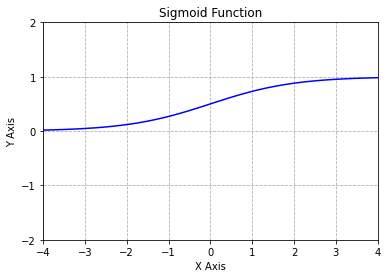

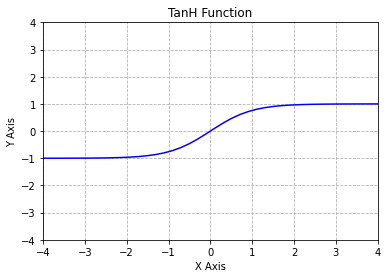

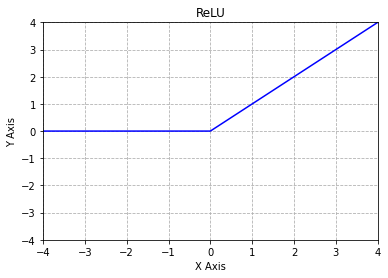

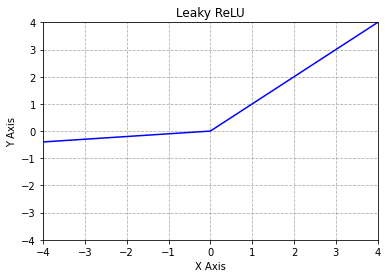

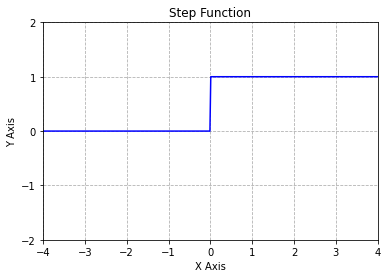

done


In [6]:
##### Sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,100)
fig = plt.figure()
plt.plot(y,sigmoid(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.ylim(-2, 2)
plt.xlim(-4, 4)
plt.show()
#plt.savefig('sigmoid.png')

fig = plt.figure()
##### TanH
tanh = lambda x: 2*sigmoid(2*x)-1
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,100)
plt.plot(y,tanh(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('TanH Function')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()
#plt.savefig('tanh.png')

fig = plt.figure()
##### ReLU
relu = lambda x: np.where(x>=0, x, 0)
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,1000)
plt.plot(y,relu(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()
#plt.savefig('relu.png')

fig = plt.figure()
##### Leaky ReLU
leakyrelu = lambda x: np.where(x>=0, x, 0.1*x)
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,1000)
plt.plot(y,leakyrelu(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Leaky ReLU')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()
#plt.savefig('lrelu.png')

fig = plt.figure()
##### Binary Step
bstep = lambda x: np.where(x>=0, 1, 0)
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,1000)
plt.plot(y,bstep(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Step Function')
plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.ylim(-2, 2)
plt.xlim(-4, 4)
plt.show()
#plt.savefig('step.png')

print('done')

# 12 - Feed-Forward Neural Network

In [8]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # images are 28x28
hidden_size = 500 # can try different classes
num_classes = 10 # classes are 0-9
num_epochs = 2 # can set to higher value if needed
batch_size = 100
learning_rate = 0.001

In [9]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./pytorch/data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./pytorch/data', train=False, transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

9913344it [00:01, 6501267.57it/s]                             


Extracting ./pytorch/data\MNIST\raw\train-images-idx3-ubyte.gz to ./pytorch/data\MNIST\raw



29696it [00:00, 5945300.79it/s]          

Extracting ./pytorch/data\MNIST\raw\train-labels-idx1-ubyte.gz to ./pytorch/data\MNIST\raw



1649664it [00:00, 2739982.28it/s]                             


Extracting ./pytorch/data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./pytorch/data\MNIST\raw



5120it [00:00, ?it/s]                   

Extracting ./pytorch/data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./pytorch/data\MNIST\raw



torch.Size([100, 1, 28, 28]) torch.Size([100])


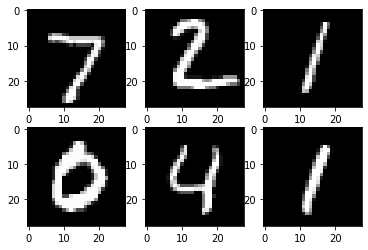

In [15]:
examples = iter(test_loader) # convert to iter object
example_data, example_targets = examples.next()
print(example_data.shape, example_targets.shape) # 100 is batch size, 1 is number of colour channels, (28, 28) is image size

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [17]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end, just returning output
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss() # applies softmax
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
# Train the model
n_total_steps = len(train_loader) 
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.3796
Epoch [1/2], Step [200/600], Loss: 0.3489
Epoch [1/2], Step [300/600], Loss: 0.1828
Epoch [1/2], Step [400/600], Loss: 0.1773
Epoch [1/2], Step [500/600], Loss: 0.1623
Epoch [1/2], Step [600/600], Loss: 0.1476
Epoch [2/2], Step [100/600], Loss: 0.1021
Epoch [2/2], Step [200/600], Loss: 0.0845
Epoch [2/2], Step [300/600], Loss: 0.1714
Epoch [2/2], Step [400/600], Loss: 0.1022
Epoch [2/2], Step [500/600], Loss: 0.1074
Epoch [2/2], Step [600/600], Loss: 0.1672


In [19]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images) # test set of images with trained model
        # max returns (value ,index) - index is the class label
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0) # number of samples in current batch
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 96.85 %


# 13 - Convolutional Neural Network (CNN)

CNNs have convolutional filters and pooling layers to learn features from images

Filter kernels applied to images

Max pooling used to downsample image by applying a maximum filter to subregions of the image, reduces computational cost and parameters needed to learn, reduces overfitting by providing an abstracted form of the input image

<img src="./maxpooling.png">

In [20]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters 
num_epochs = 5 # accuracies for each class will be low with small number of epochs, increase this for higher accuracy
batch_size = 4
learning_rate = 0.001

In [22]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./pytorch/data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./pytorch/data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1091)>

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

<img src="./cnn.png">

<img src="./conv_layer.png">

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # input channel size: 3 (images have 3 colour channels), output channel size: 6, kernel size: 5 (i.e. 5x5 kernel)
        self.pool = nn.MaxPool2d(2, 2) # kernel size and stride (how many pixels shifted after each kernel operation) of 2
        self.conv2 = nn.Conv2d(6, 16, 5) # input channel size must be equal to previous conv output channel size
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # final size after both conv and pooling layers are applied is 16x5x5 (5x5 image with 16 channels), need to flatten to 1D tensor hence input size is 16*5*5; can try different output size
        self.fc2 = nn.Linear(120, 84) # can try number different to 84
        self.fc3 = nn.Linear(84, 10) # 10 classes

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14 - activation function doesn't change size 
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400 - -1 will represent the number of samples in batch i.e. 4, as defined above
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10 - no softmax, included in CrossEntropyLoss
        return x

In [ ]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './pytorch/cnn.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

# 14 - Transfer Learning

In [2]:
# Model developed for one task is re-used as a starting point for another task - allows rapid generation of new models (training on new untrained models can take time)
# Can be done by changing last layer

<img src="./transfer.png">

In [3]:
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

In [ ]:
data_dir = 'data/hymenoptera_data' # has at least 'train' and 'val' folders, with folders for each class in them containing the datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=0) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)

In [ ]:
def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.

model = models.resnet18(pretrained=True) # resnet 18 CNN trained on > 1 mil images, can classify into 1000 object categories
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2) # new output layer
model = model.to(device)

criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1) # every 7 epochs, learning rate is multiplied by gamma
model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)

In [ ]:
#### ConvNet as fixed feature extractor ####
# Here, we want to freeze all the network except the final layer.
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward() 
# can make training faster by not training and calculating gradients of all layers, just the last one
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)
model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()
# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=25)

# 15 - TensorBoard

In [11]:
# Same code as 12 except for changes specfied below for TensorBoard

############## TENSORBOARD ########################
import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('./runs/mnist2') # change to wherever you want to store events for a particular dataset (name it whatever you want), then do in cmd "tensorboard --logdir=PATH_TO_RUNS_FOLDER"
###################################################

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 1
batch_size = 64
learning_rate = 0.01

In [12]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

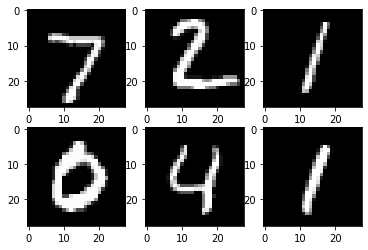

In [13]:
examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
#plt.show()

############## TENSORBOARD ########################
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid) # custom label provided for image grid

#if using as .py script which has other stuff after this but you only want to test image loading for now
#writer.close()
#sys.exit()
###################################################

In [14]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

############## TENSORBOARD ########################
writer.add_graph(model, example_data.reshape(-1, 28*28)) # can give a batch as input
#writer.close()
#sys.exit()
###################################################

In [15]:
# Train the model
running_loss = 0.0
running_correct = 0 # running number of correct predictions
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            ############## TENSORBOARD ########################
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0
            ###################################################

# can see learning/loss curves and change parameters like learning rate to interactively optimise model (mnist1 has 0.001 LR, mnist2 has 0.01 LR)

Epoch [1/1], Step [100/938], Loss: 0.2115
Epoch [1/1], Step [200/938], Loss: 0.1266
Epoch [1/1], Step [300/938], Loss: 0.1666
Epoch [1/1], Step [400/938], Loss: 0.2656
Epoch [1/1], Step [500/938], Loss: 0.1251
Epoch [1/1], Step [600/938], Loss: 0.2100
Epoch [1/1], Step [700/938], Loss: 0.1034
Epoch [1/1], Step [800/938], Loss: 0.3234
Epoch [1/1], Step [900/938], Loss: 0.4483


In [16]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
class_labels = []
class_preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        values, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        class_probs_batch = [F.softmax(output, dim=0) for output in outputs] # turns output into probabilities between 0 and 1 - required for TensorBoard PR curve

        class_preds.append(class_probs_batch)
        class_labels.append(predicted)

    # 10000, 10, and 10000, 1
    # stack concatenates tensors along a new dimension
    # cat concatenates tensors in the given dimension
    class_preds = torch.cat([torch.stack(batch) for batch in class_preds])
    class_labels = torch.cat(class_labels)

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

    ############## TENSORBOARD ########################
    classes = range(10)
    for i in classes:
        labels_i = class_labels == i
        preds_i = class_preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()
    ###################################################

Accuracy of the network on the 10000 test images: 95.75 %


# 16 - Saving and Loading Models

In [ ]:
''' 3 DIFFERENT METHODS TO REMEMBER:
 - torch.save(arg, PATH) # can be model, tensor, or dictionary
 - torch.load(PATH)
 - torch.load_state_dict(arg)
'''

''' 2 DIFFERENT WAYS OF SAVING
# 1) lazy way: save whole model
torch.save(model, PATH)

# model class must be defined somewhere - data is bound to classes and directory structure
model = torch.load(PATH)
model.eval()

# 2) recommended way: save only the state_dict and use later for inference if needed
torch.save(model.state_dict(), PATH)

# model must be created again with parameters
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
'''

In [ ]:
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)
# train your model...

####################save all ######################################
for param in model.parameters():
    print(param)

# save and load entire model
FILE = "model.pth"
torch.save(model, FILE)

loaded_model = torch.load(FILE)
loaded_model.eval()

for param in loaded_model.parameters():
    print(param)

############save only state dict #########################
# save only state dict
FILE = "model.pth"
torch.save(model.state_dict(), FILE)

print(model.state_dict())
loaded_model = Model(n_input_features=6)
loaded_model.load_state_dict(torch.load(FILE)) # it takes the loaded dictionary, not the path file itself
loaded_model.eval()
print(loaded_model.state_dict())

###########load checkpoint#####################
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

checkpoint = {"epoch": 90, "model_state": model.state_dict(), "optim_state": optimizer.state_dict()}
print(optimizer.state_dict())
FILE = "checkpoint.pth"
torch.save(checkpoint, FILE)

model = Model(n_input_features=6)
optimizer = optimizer = torch.optim.SGD(model.parameters(), lr=0)

checkpoint = torch.load(FILE)
model.load_state_dict(checkpoint['model_state'])
optimizer.load_state_dict(checkpoint['optim_state'])
epoch = checkpoint['epoch']

model.eval() # or model.train()
print(optimizer.state_dict())

# Remember that you must call model.eval() to set dropout and batch normalization layers 
# to evaluation mode before running inference. Failing to do this will yield 
# inconsistent inference results. If you wish to resuming training, 
# call model.train() to ensure these layers are in training mode.

In [ ]:
""" SAVING ON GPU/CPU 

# 1) Save on GPU, Load on CPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

device = torch.device('cpu')
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location=device))

# 2) Save on GPU, Load on GPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.to(device)

# Note: Be sure to use the .to(torch.device('cuda')) function 
# on all model inputs, too!

# 3) Save on CPU, Load on GPU
torch.save(model.state_dict(), PATH)

device = torch.device("cuda")
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location="cuda:0"))  # Choose whatever GPU device number you want
model.to(device)

# This loads the model to a given GPU device. 
# Next, be sure to call model.to(torch.device('cuda')) to convert the model’s parameter tensors to CUDA tensors
"""